<a href="https://colab.research.google.com/github/Juanisazalu/TRABAJO-2/blob/main/TRABAJO%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure




# EXPLORACION DE DATOS

In [2]:
tabla=pd.read_csv("CC GENERAL.csv")

Variables:

CUST_ID: Identificación del titular de la tarjeta de crédito 
SALDO: Monto del saldo restante en su cuenta para realizar compras 
BALANCE_FREQUENCY: Frecuencia con la que se actualiza el Saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)
COMPRAS: Cantidad de compras realizadas desde la cuenta
ONEOFF_PURCHASES: Monto máximo de compra realizada de una sola vez
INSTALLMENTS_PURCHASES: Monto de la compra realizada en cuotas
CASH_ADVANCE: anticipo en efectivo otorgado por el usuario
PURCHASES_FREQUENCY: Con qué frecuencia se realizan las compras, puntúe entre 0 y 1 (1 = compra frecuente, 0 = compra no frecuente)
ONEOFFPURCHASESFREQUENCY: Con qué frecuencia se realizan compras de una sola vez (1 = compradas con frecuencia, 0 = compradas no frecuentes)
COMPRAS A PLAZOS FRECUENCIA: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
CASHADVANCEFREQUENCY: Con qué frecuencia se paga el anticipo en efectivo
CASHADVANCETRX: Número de Transacciones realizadas con "Cash in Advanced"
PURCHASES_TRX: Número de transacciones de compra realizadas
CREDIT_LIMIT: Límite de tarjeta de crédito para el usuario
PAGOS: Monto del pago realizado por el usuario
MINIMUM_PAYMENTS: Monto mínimo de pagos realizados por usuario
PRCFULLPAYMENT: Porcentaje del pago total pagado por el usuario
TENENCIA: Tenencia del servicio de tarjeta de crédito para el usuario.

En el conjunto de datos proporcionado, cada variable representa diferentes aspectos del comportamiento de los titulares de tarjetas de crédito. A continuación, te proporciono una interpretación de cada una de las variables:

CUST_ID (Identificación de Titular de Tarjeta de Crédito): Esta variable es una identificación única o código para cada titular de una tarjeta de crédito. Es una variable categórica que se utiliza para distinguir a los titulares de tarjetas de crédito en el conjunto de datos.

BALANCE (Saldo): Esta variable indica la cantidad de dinero que un titular de tarjeta de crédito tiene disponible en su cuenta para realizar compras. Es una medida del saldo actual en la cuenta del titular.

BALANCE_FREQUENCY (Frecuencia de Actualización de Saldo): Representa la frecuencia con la que el saldo de la cuenta se actualiza, con un puntaje que varía entre 0 y 1. Un puntaje de 1 significa que el saldo se actualiza con frecuencia, mientras que un puntaje de 0 indica que el saldo no se actualiza con frecuencia.

PURCHASES (Compras): Indica el monto total de las compras realizadas desde la cuenta de la tarjeta de crédito durante un período de tiempo.

ONEOFF_PURCHASES (Compras en un Solo Pago): Representa el monto máximo gastado en una sola compra.

INSTALLMENTS_PURCHASES (Compras en Cuotas): Indica la cantidad de compras realizadas en cuotas o a plazos.

CASH_ADVANCE (Avance de Efectivo): Muestra la cantidad de dinero en efectivo solicitada o retirada por el titular de la tarjeta de crédito.

PURCHASES_FREQUENCY (Frecuencia de Compras): Representa la frecuencia con la que se realizan compras, con un puntaje entre 0 y 1. Un puntaje de 1 indica que las compras se realizan con frecuencia.

ONEOFFPURCHASESFREQUENCY (Frecuencia de Compras en un Solo Pago): Indica con qué frecuencia se realizan compras en un solo pago.

PURCHASESINSTALLMENTSFREQUENCY (Frecuencia de Compras a Plazos): Muestra la frecuencia de las compras a plazos.

CASHADVANCEFREQUENCY (Frecuencia de Avances de Efectivo): Indica la frecuencia con la que se realizan avances de efectivo.

CASHADVANCETRX (Número de Transacciones de Avance de Efectivo): Representa el número de transacciones realizadas con avances de efectivo.

PURCHASES_TRX (Número de Transacciones de Compras): Indica el número de transacciones de compra realizadas.

CREDIT_LIMIT (Límite de Crédito): Representa el límite de crédito otorgado al titular de la tarjeta de crédito.

PAYMENTS (Pagos): Muestra la cantidad total de pagos realizados por el titular de la tarjeta de crédito.

MINIMUM_PAYMENTS (Pagos Mínimos): Indica la cantidad mínima de pagos que el titular de la tarjeta de crédito está obligado a realizar.

PRCFULLPAYMENT (Porcentaje de Pago Total): Representa el porcentaje del pago total realizado por el titular de la tarjeta de crédito.

TENURE (Duración de la Tenencia): Indica la duración o antigüedad del servicio de la tarjeta de crédito para el titular de la tarjeta.

Estas variables proporcionan información sobre el comportamiento financiero y el uso de la tarjeta de crédito por parte de los titulares, lo que puede ser útil para segmentar a los clientes y desarrollar estrategias de marketing dirigidas a grupos específicos.

Renombrar nombre de variables

In [15]:
tabla=tabla.rename(columns={"CUST_ID":"id","BALANCE":"saldo","BALANCE_FREQUENCY":"frecuenciaactsaldo","PURCHASES":"comprastotales","ONEOFF_PURCHASES":"montomaxcomprado","INSTALLMENTS_PURCHASES":"montoacuotas","CASH_ADVANCE":"anticipoefectivo","PURCHASES_FREQUENCY":"frecuenciacompras","ONEOFF_PURCHASES_FREQUENCY":"freccomprasunavez","PURCHASES_INSTALLMENTS_FREQUENCY":"freccomprasplazo","CASH_ADVANCE_FREQUENCY":"frecpagoantefectivo","CASH_ADVANCE_TRX":"ntranscashinadv","PURCHASES_TRX":"ntransacciones","CREDIT_LIMIT":"limtarjetacredito","PAYMENTS":"pagos","MINIMUM_PAYMENTS":"montominpagos","PRC_FULL_PAYMENT":"%totalpagado","TENURE":"antieguedad"})                                                                                            
tabla

,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,tenencia
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [16]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saldo                8950 non-null   float64
 1   frecuenciaactsaldo   8950 non-null   float64
 2   comprastotales       8950 non-null   float64
 3   montomaxcomprado     8950 non-null   float64
 4   montoacuotas         8950 non-null   float64
 5   anticipoefectivo     8950 non-null   float64
 6   frecuenciacompras    8950 non-null   float64
 7   freccomprasunavez    8950 non-null   float64
 8   freccomprasplazo     8950 non-null   float64
 9   frecpagoantefectivo  8950 non-null   float64
 10  ntranscashinadv      8950 non-null   int64  
 11  ntransacciones       8950 non-null   int64  
 12  limtarjetacredito    8949 non-null   float64
 13  pagos                8950 non-null   float64
 14  montominpagos        8637 non-null   float64
 15  %totalpagado         8950 non-null   f

Se elimina la variable ID

In [8]:
tabla.drop("id",axis=1,inplace=True)

## EDA

In [9]:
tabla.isnull().sum()

saldo                    0
frecuenciaactsaldo       0
comprastotales           0
montomaxcomprado         0
montoacuotas             0
anticipoefectivo         0
frecuenciacompras        0
freccomprasunavez        0
freccomprasplazo         0
frecpagoantefectivo      0
ntranscashinadv          0
ntransacciones           0
limtarjetacredito        1
pagos                    0
montominpagos          313
%totalpagado             0
tenencia                 0
dtype: int64

Relleno de nulos

In [12]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saldo                8950 non-null   float64
 1   frecuenciaactsaldo   8950 non-null   float64
 2   comprastotales       8950 non-null   float64
 3   montomaxcomprado     8950 non-null   float64
 4   montoacuotas         8950 non-null   float64
 5   anticipoefectivo     8950 non-null   float64
 6   frecuenciacompras    8950 non-null   float64
 7   freccomprasunavez    8950 non-null   float64
 8   freccomprasplazo     8950 non-null   float64
 9   frecpagoantefectivo  8950 non-null   float64
 10  ntranscashinadv      8950 non-null   int64  
 11  ntransacciones       8950 non-null   int64  
 12  limtarjetacredito    8949 non-null   float64
 13  pagos                8950 non-null   float64
 14  montominpagos        8637 non-null   float64
 15  %totalpagado         8950 non-null   f

Buscamos la distribucion de la variable montominpagos para llenar adecuadamente los nulos

{'whiskers': [<matplotlib.lines.Line2D at 0x19db63b4eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x19db63b53f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19db63b4b50>],
 'medians': [<matplotlib.lines.Line2D at 0x19db63b5930>],
 'fliers': [<matplotlib.lines.Line2D at 0x19db63b5bd0>],
 'means': []}

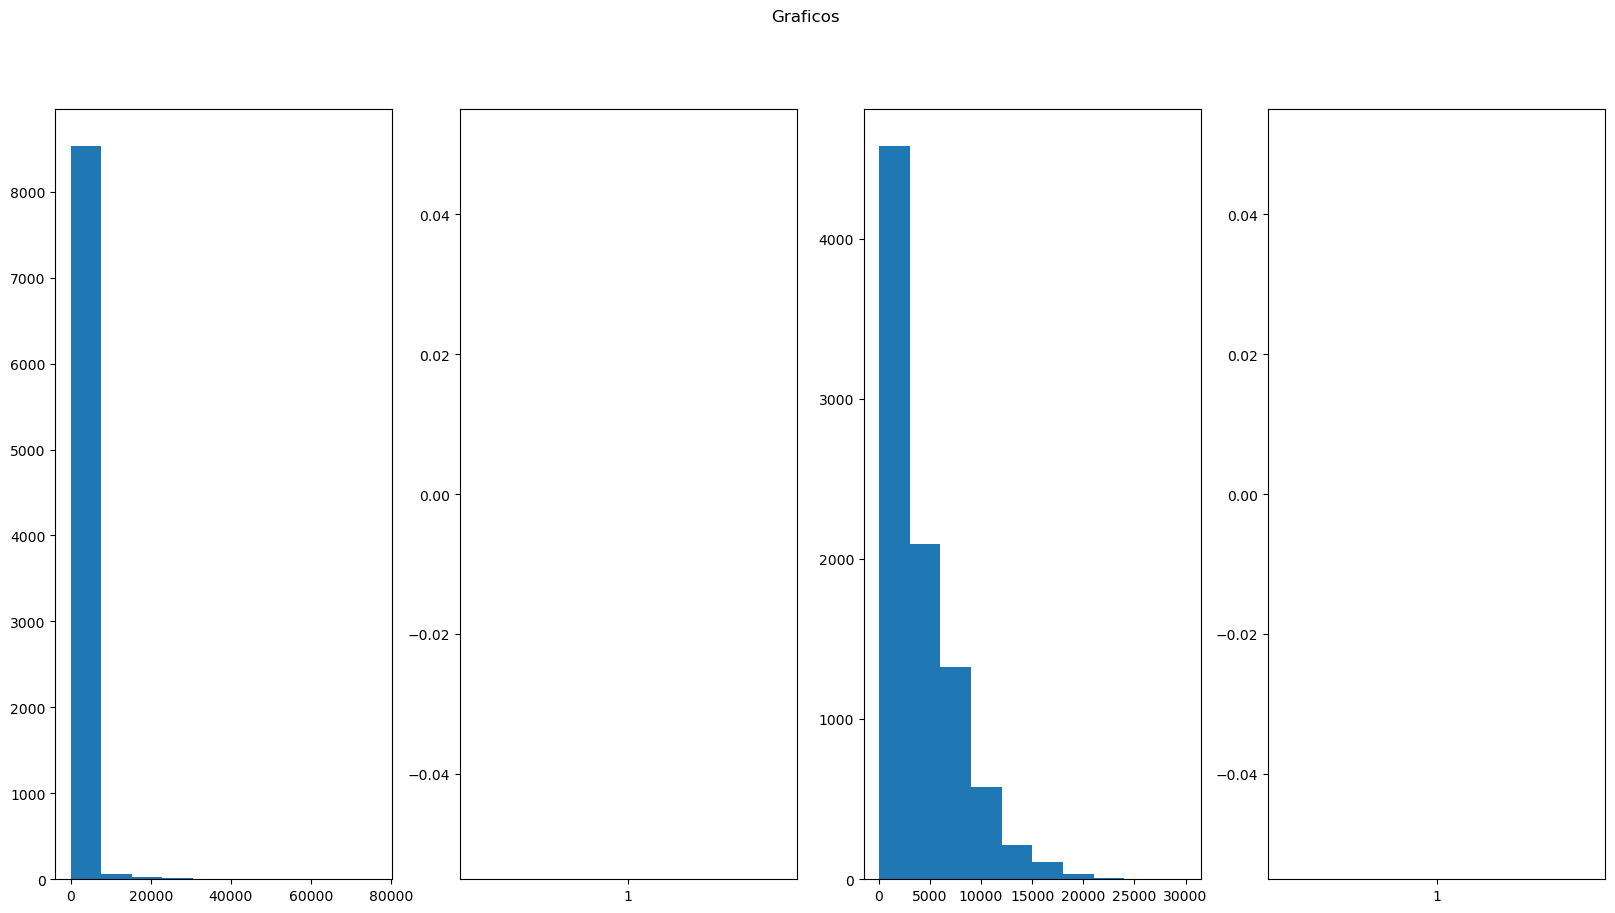

In [46]:
fig, ax= plt.subplots(figsize=(20,10), nrows=1, ncols=4)
fig.suptitle("Graficos")
ax[0].hist(tabla["montominpagos"])
ax[1].boxplot(tabla["montominpagos"]) 
ax[2].hist(tabla["limtarjetacredito"]) 
ax[3].boxplot(tabla["limtarjetacredito"]) 

Relleno de nulos con la media en ambas variables

In [52]:
#tabla.fillna(tabla.mean(),inplace=True)
tabla.isnull().sum()


saldo                  0
frecuenciaactsaldo     0
comprastotales         0
montomaxcomprado       0
montoacuotas           0
anticipoefectivo       0
frecuenciacompras      0
freccomprasunavez      0
freccomprasplazo       0
frecpagoantefectivo    0
ntranscashinadv        0
ntransacciones         0
limtarjetacredito      0
pagos                  0
montominpagos          0
%totalpagado           0
tenencia               0
dtype: int64

In [53]:
tabla.tenencia.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

Como se observa en la distribucion, la variable no sigue una distribucion, por lo tanto se llenara con

<Axes: >

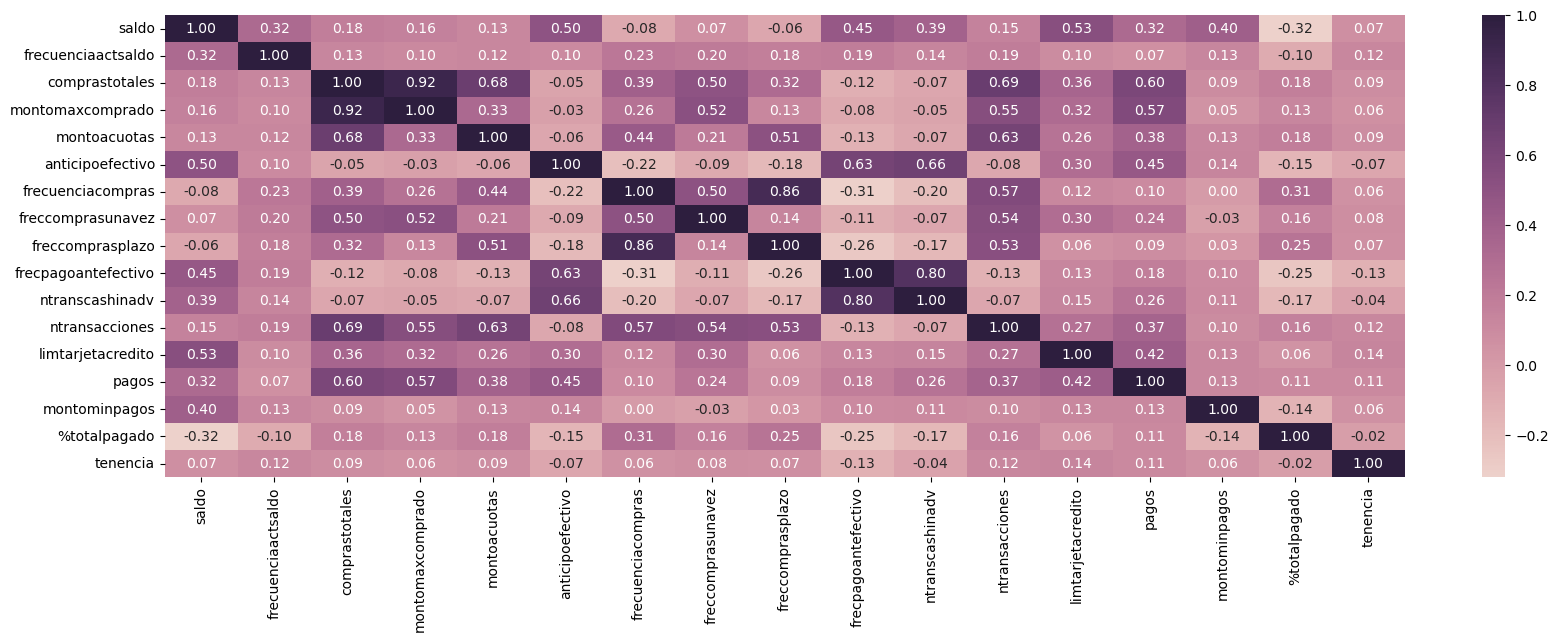

In [11]:
figure(figsize=(20,6))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

In [58]:
len(tabla.columns)

17

In [63]:
tabla1=tabla.iloc[:,0:6]
tabla1

,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo
0,40.900749,0.818182,95.40,0.00,95.40,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017
4,817.714335,1.000000,16.00,16.00,0.00,0.000000
...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778


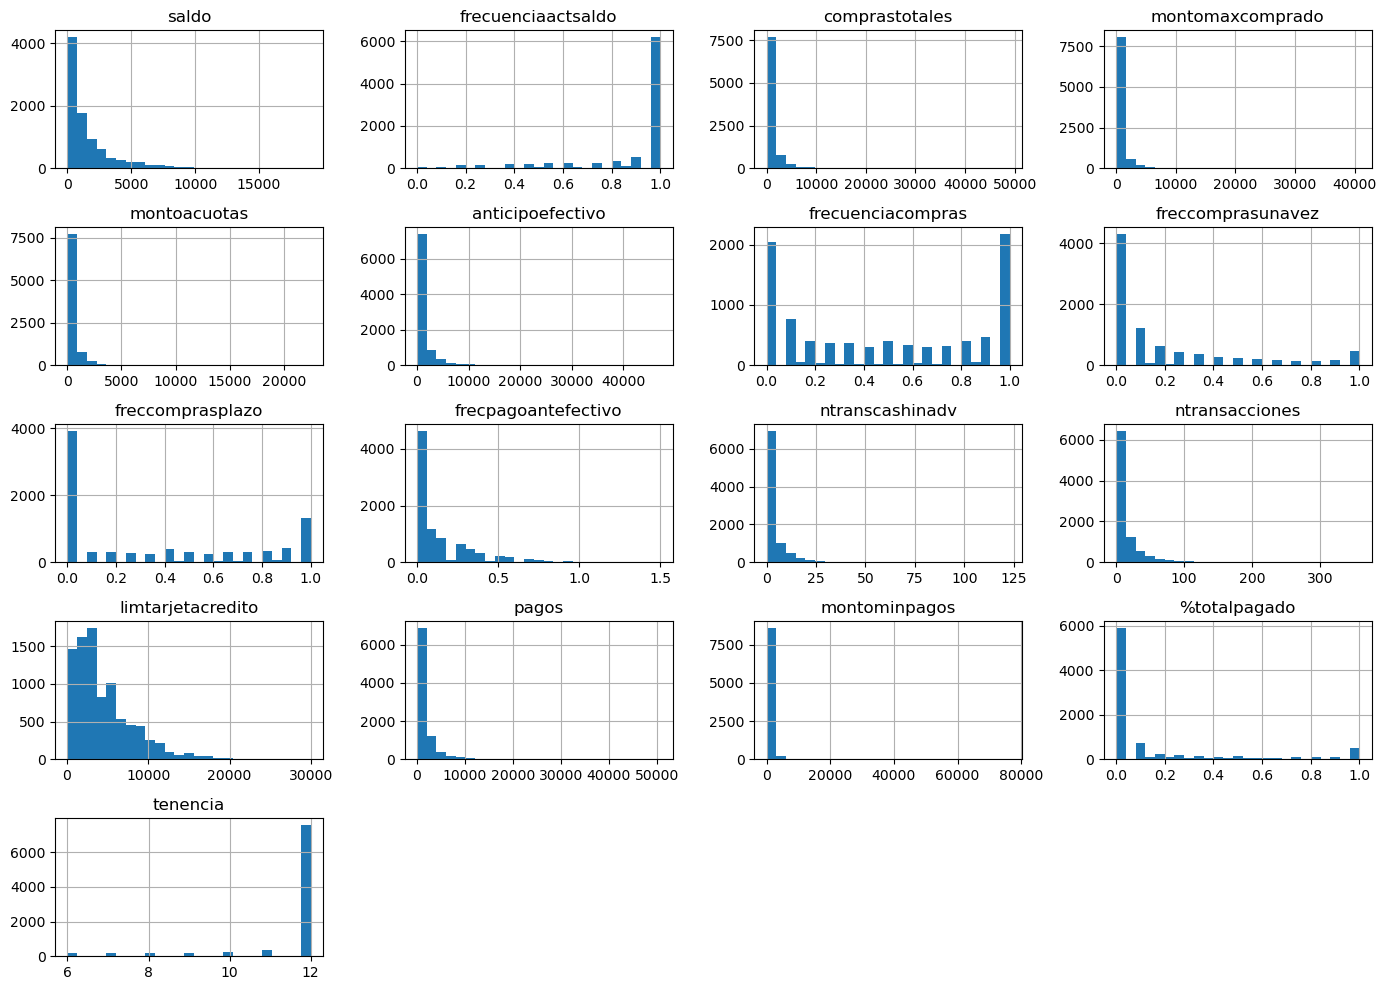

In [79]:
tabla.hist(figsize=(14,10), bins=25)
plt.tight_layout()
plt.show()

Escalado de variables

In [84]:
scaler = StandardScaler()
scaled_tabla=pd.DataFrame(scaler.fit_transform(tabla),columns=tabla.columns)
scaled_tabla


,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,tenencia
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


## Tratamiendo de valares atipicos

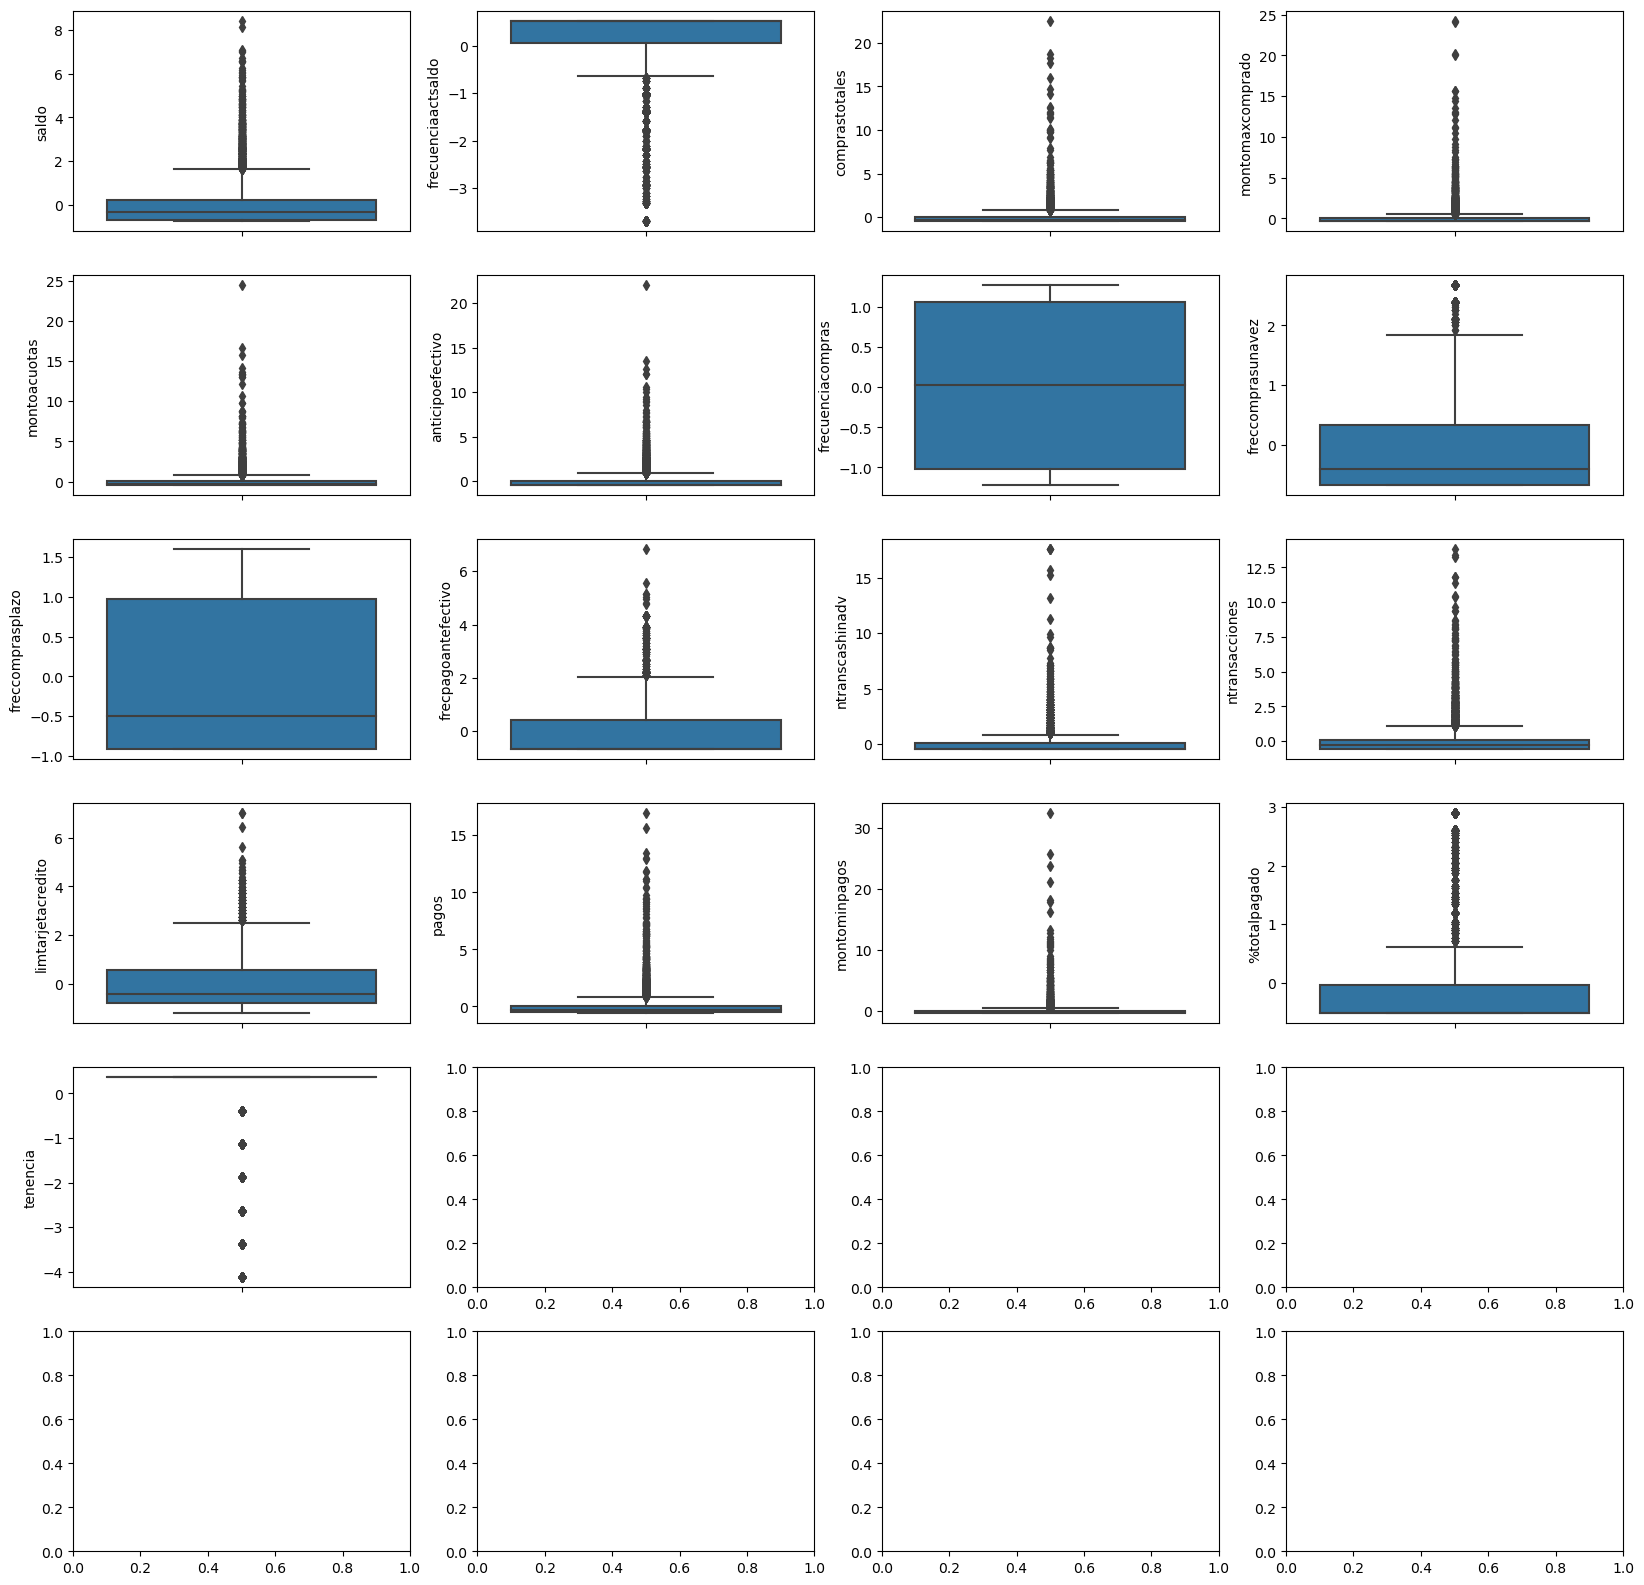

In [85]:
# Tratamiento de valores atípicos
train_tabla_out = scaled_tabla.copy()

# Sentar las bases de un "mosaico boxplot de 6x4 (para cubrir 22 variables)":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=6,figsize=(20,20))

for idx,i in enumerate(train_tabla_out.columns):
    sns.boxplot(y=train_tabla_out[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

# MODELO 1

In [7]:
# instancia de la clase standarScaler y escalado de variables
scaler = StandardScaler()
variables_esc= scaler.fit_transform(tabla)

In [84]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(variables_esc)
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)


valor del SSE mas bajo:  111986.63012447306
[[-0.36306946 -0.17744827 -0.23524842 -0.20656378 -0.17664567 -0.30614862
  -0.07029714 -0.24171898 -0.05241041 -0.32840042 -0.29534856 -0.24710784
  -0.3356835  -0.28420101 -0.13206002  0.00186624 -0.02975215]
 [ 0.30403413  0.43972786  1.51173187  1.26836523  1.2438421  -0.24952597
   1.14202629  1.56476892  0.94331011 -0.36137307 -0.25287174  1.66568851
   0.87763915  0.82383928  0.15038332  0.50383459  0.29860839]
 [ 1.18057376  0.34394401 -0.28751565 -0.20519889 -0.30290651  1.40046172
  -0.63850017 -0.30459492 -0.54957726  1.57726808  1.36078227 -0.36424716
   0.61398873  0.45514209  0.39755515 -0.41064476 -0.12235168]]
Numero de iteraciones:  13


In [56]:
#Predecir valores de etiquetas
label = kmeans.fit_predict(variables_esc)
print(label[0:100])


[0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 2 2 0 0 0 2 0 2 0 2 0 1 0 2
 1 2 2 0 0 0 0 1 0 0 2 1 0 2 0 0 0 0 0 2 1 0 2 0 0 2 0 1 0 0 0 0 0 2 2 0 0
 0 0 1 0 0 2 0 0 0 0 1 1 2 2 0 2 1 2 0 0 0 0 0 2 0 0]


## Metodo del codo

In [57]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(variables_esc)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


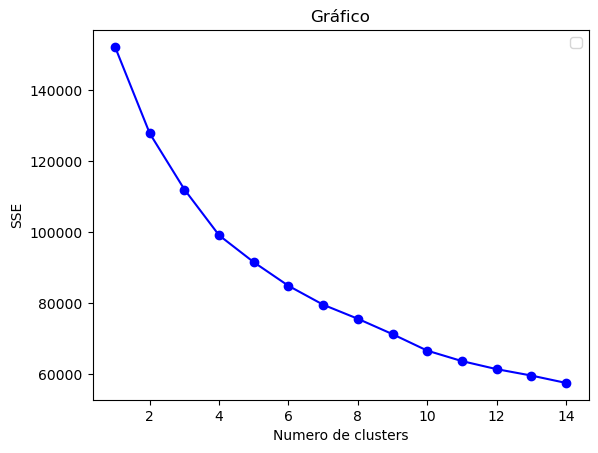

In [60]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

## Coeficiente de siluete

In [64]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(variables_esc)
  score = silhouette_score(variables_esc, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


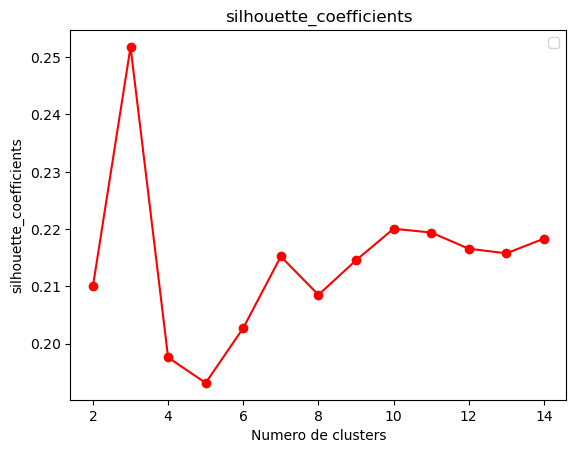

In [66]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

# Diagrama de clusters

In [8]:
# Función de vinculación para agrupar datos según similud
Z = linkage(tabla, method='ward', metric='euclidean')
Z[:100]

array([[5.21900000e+03, 8.44200000e+03, 4.84679340e+00, 2.00000000e+00],
       [1.13100000e+03, 5.92800000e+03, 5.17391107e+00, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.98212337e+00, 2.00000000e+00],
       [4.18500000e+03, 7.36600000e+03, 1.13095917e+01, 2.00000000e+00],
       [4.62900000e+03, 7.91900000e+03, 1.18228254e+01, 2.00000000e+00],
       [8.60300000e+03, 8.64000000e+03, 1.25061920e+01, 2.00000000e+00],
       [1.23500000e+03, 6.98500000e+03, 1.32381056e+01, 2.00000000e+00],
       [6.79600000e+03, 7.39100000e+03, 1.33883214e+01, 2.00000000e+00],
       [8.73300000e+03, 8.88800000e+03, 1.35405921e+01, 2.00000000e+00],
       [8.62100000e+03, 8.64100000e+03, 1.36841595e+01, 2.00000000e+00],
       [2.32000000e+03, 2.86100000e+03, 1.39968875e+01, 2.00000000e+00],
       [3.94300000e+03, 6.09500000e+03, 1.41794774e+01, 2.00000000e+00],
       [8.69500000e+03, 8.87700000e+03, 1.43030671e+01, 2.00000000e+00],
       [2.47000000e+02, 8.06800000e+03, 1.47571366e

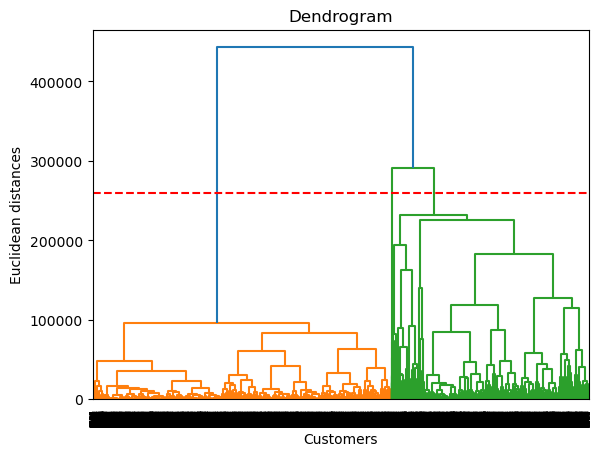

In [10]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(tabla, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=260000, color='red', linestyle='--')
plt.show()


In [91]:
# Dibujo del dendograma
labelList = list(tabla1['id'])
print(labelList)
plt.figure(figsize=(100, 100))
dendrogram(Z,orientation='right',labels=labelList, distance_sort='descending',show_leaf_counts=False,leaf_font_size=16)
plt.show()

['C10001', 'C10002', 'C10003', 'C10004', 'C10005', 'C10006', 'C10007', 'C10008', 'C10009', 'C10010', 'C10011', 'C10012', 'C10013', 'C10014', 'C10015', 'C10016', 'C10017', 'C10018', 'C10019', 'C10020', 'C10021', 'C10022', 'C10023', 'C10024', 'C10025', 'C10026', 'C10027', 'C10028', 'C10029', 'C10030', 'C10031', 'C10032', 'C10033', 'C10034', 'C10035', 'C10036', 'C10037', 'C10038', 'C10039', 'C10040', 'C10041', 'C10043', 'C10044', 'C10045', 'C10046', 'C10047', 'C10048', 'C10049', 'C10050', 'C10051', 'C10052', 'C10053', 'C10054', 'C10055', 'C10056', 'C10057', 'C10058', 'C10059', 'C10060', 'C10061', 'C10062', 'C10063', 'C10064', 'C10065', 'C10067', 'C10068', 'C10069', 'C10070', 'C10071', 'C10072', 'C10073', 'C10074', 'C10075', 'C10077', 'C10078', 'C10079', 'C10080', 'C10081', 'C10082', 'C10083', 'C10084', 'C10085', 'C10086', 'C10087', 'C10088', 'C10089', 'C10090', 'C10092', 'C10093', 'C10094', 'C10095', 'C10096', 'C10097', 'C10098', 'C10099', 'C10100', 'C10101', 'C10102', 'C10103', 'C10104',

TypeError: 'dict' object is not callable

<Figure size 10000x10000 with 0 Axes>

In [ ]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()